✅ Objective:

To analyze departmental strengths, weaknesses, and turnover trends based on key metrics like performance, tenure, and activity status. This supports resource allocation, support planning, and early risk detection.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = r"D:\DATASCIENCE AND AI\ANALYTICS\internship\mark 5\cleaned dataset full\cleaned3.csv"
df = pd.read_csv(file_path)

# Convert ExitDate to datetime if needed
df['ExitDate'] = pd.to_datetime(df['ExitDate'], errors='coerce')
df['IsActive'] = df['IsActive'].astype(bool)

# Add derived columns
df['TenureYears'] = df['TenureDays'] / 365
df['Exited'] = df['ExitDate'].notnull().astype(int)


C:\Users\alanm\AppData\Local\Temp\ipykernel_7816\2102390126.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ExitDate'] = pd.to_datetime(df['ExitDate'], errors='coerce')


Department-wise Performance Overview

C:\Users\alanm\AppData\Local\Temp\ipykernel_7816\2668242037.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_perf.index, y=dept_perf.values, palette='coolwarm')


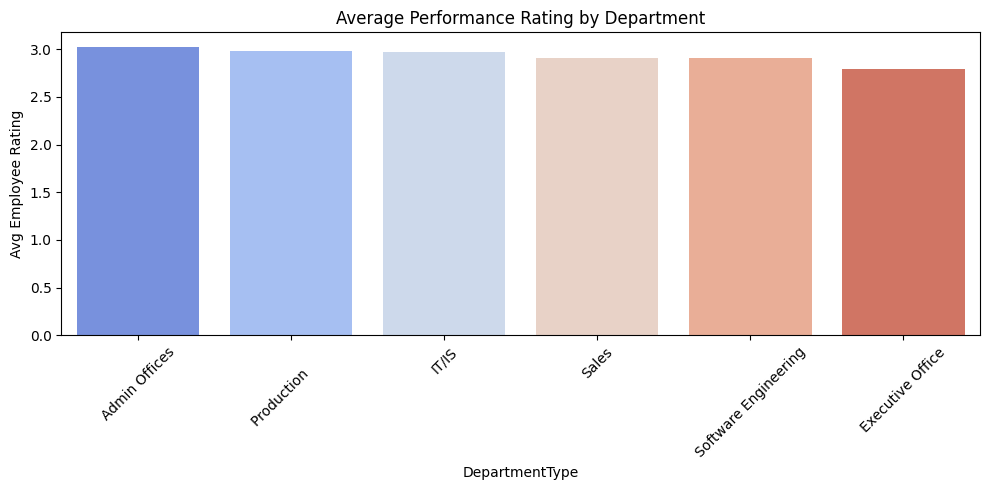

In [2]:
# Average performance rating by department
dept_perf = df.groupby('DepartmentType')['Current Employee Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=dept_perf.index, y=dept_perf.values, palette='coolwarm')
plt.title("Average Performance Rating by Department")
plt.xticks(rotation=45)
plt.ylabel("Avg Employee Rating")
plt.tight_layout()
plt.show()


Department-wise Average Tenure

C:\Users\alanm\AppData\Local\Temp\ipykernel_7816\606199795.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_tenure.index, y=dept_tenure.values, palette='crest')


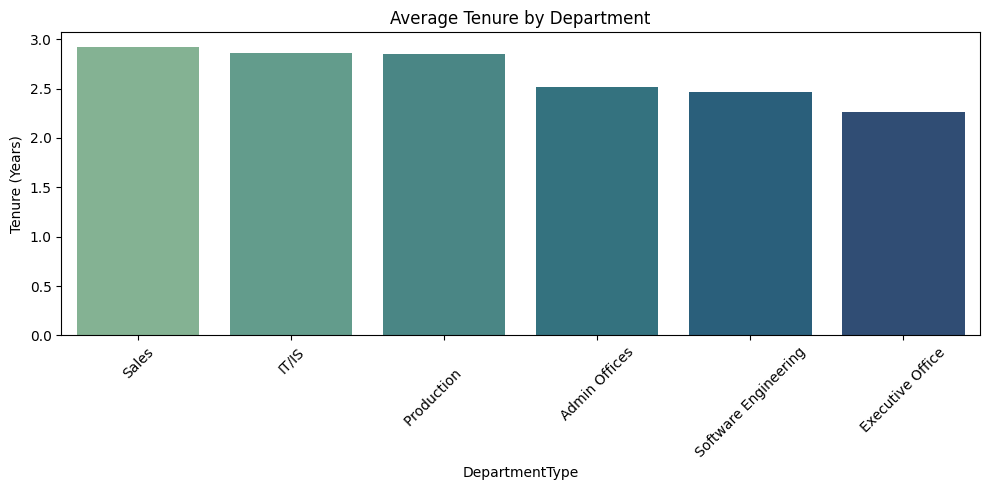

In [3]:
dept_tenure = df.groupby('DepartmentType')['TenureYears'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=dept_tenure.index, y=dept_tenure.values, palette='crest')
plt.title("Average Tenure by Department")
plt.xticks(rotation=45)
plt.ylabel("Tenure (Years)")
plt.tight_layout()
plt.show()


Department-wise Attrition Rate

C:\Users\alanm\AppData\Local\Temp\ipykernel_7816\2342238630.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_attrition.index, y=dept_attrition.values, palette='flare')


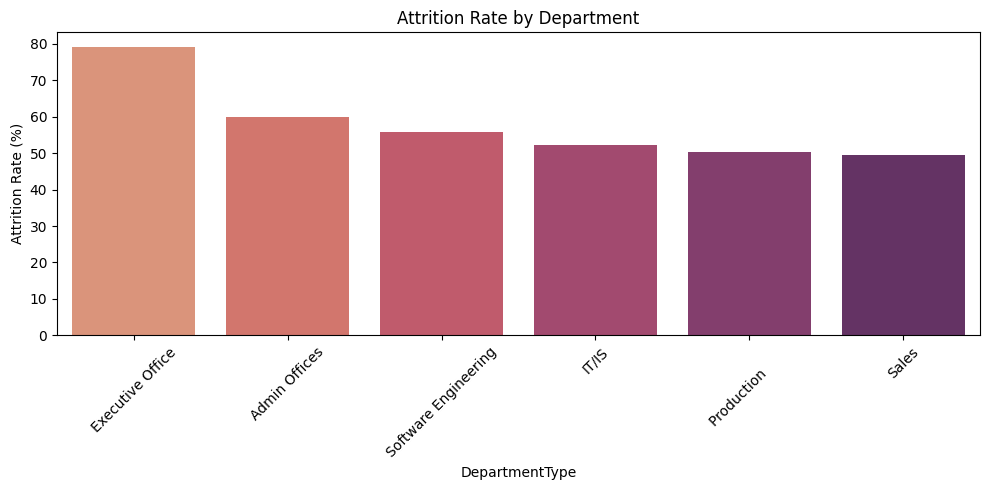

In [4]:
# Calculate attrition rate as % exited
dept_attrition = df.groupby('DepartmentType')['Exited'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=dept_attrition.index, y=dept_attrition.values, palette='flare')
plt.title("Attrition Rate by Department")
plt.xticks(rotation=45)
plt.ylabel("Attrition Rate (%)")
plt.tight_layout()
plt.show()


Department-wise Active Employee Count

C:\Users\alanm\AppData\Local\Temp\ipykernel_7816\3804611840.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=active_counts.index, y=active_counts.values, palette='pastel')


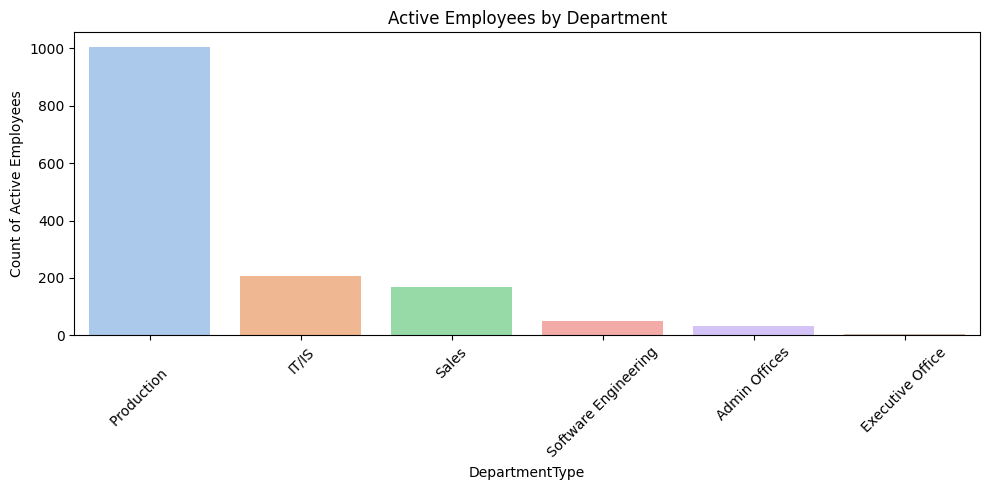

In [5]:
active_counts = df[df['IsActive']].groupby('DepartmentType').size().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=active_counts.index, y=active_counts.values, palette='pastel')
plt.title("Active Employees by Department")
plt.xticks(rotation=45)
plt.ylabel("Count of Active Employees")
plt.tight_layout()
plt.show()


Optional: Departmental Summary Table

In [6]:
# Combine all departmental stats into one table
summary_df = df.groupby('DepartmentType').agg({
    'EmpID': 'count',
    'IsActive': 'sum',
    'Current Employee Rating': 'mean',
    'TenureYears': 'mean',
    'Exited': 'mean'
}).rename(columns={
    'EmpID': 'TotalEmployees',
    'IsActive': 'ActiveEmployees',
    'Current Employee Rating': 'AvgRating',
    'TenureYears': 'AvgTenure',
    'Exited': 'AttritionRate'
})

# Convert AttritionRate to percentage
summary_df['AttritionRate'] = (summary_df['AttritionRate'] * 100).round(2)

# Display or export
print(summary_df.sort_values(by='AttritionRate', ascending=False))
# summary_df.to_csv("Departmental_Health_Summary.csv")


                      TotalEmployees  ActiveEmployees  AvgRating  AvgTenure  \
DepartmentType                                                                
Executive Office                  24                5   2.791667   2.262329   
Admin Offices                     80               32   3.025000   2.518562   
Software Engineering             115               51   2.904348   2.468541   
IT/IS                            430              206   2.969767   2.856101   
Production                      2020             1006   2.982178   2.852673   
Sales                            331              167   2.909366   2.924016   

                      AttritionRate  
DepartmentType                       
Executive Office              79.17  
Admin Offices                 60.00  
Software Engineering          55.65  
IT/IS                         52.09  
Production                    50.20  
Sales                         49.55  


📈 What We’re Analyzing and Why

| Metric               | Insight                                                |
| -------------------- | ------------------------------------------------------ |
| **Avg Rating**       | Identifies high- vs under-performing departments       |
| **Avg Tenure**       | Indicates engagement and career longevity              |
| **Attrition Rate**   | Flags departments with instability or low satisfaction |
| **Active Employees** | Helps prioritize resources and support to large teams  |


🧠 Why This Analysis Is Important:

| Business Purpose                           | Description                                                                  |
| ------------------------------------------ | ---------------------------------------------------------------------------- |
| **Spot High-Risk Units**                   | Detects departments with high attrition or low performance                   |
| **Drive Department-Specific Action Plans** | Enables tailored HR strategies for support, training, or restructuring       |
| **Support Budget Allocation**              | Justifies investments into departments with proven success or critical needs |
| **Track Workforce Stability**              | Uses tenure and active counts to assess department health                    |
| **Strategic Talent Deployment**            | Ensures key business units are staffed with high-performing teams            |


📊 What We Analyzed and Why

| Metric                      | Reason                                               |
| --------------------------- | ---------------------------------------------------- |
| **DepartmentType**          | The central unit of segmentation                     |
| **Current Employee Rating** | To evaluate departmental performance quality         |
| **TenureYears**             | To understand retention and career longevity by team |
| **IsActive**                | To count currently employed staff per department     |
| **Exited / Attrition Rate** | To identify departments with high employee turnover  |


📈 Graphs Used and Their Purpose

| Visualization                                | Purpose                                                                   |
| -------------------------------------------- | ------------------------------------------------------------------------- |
| **Bar Plot – Avg Performance by Department** | Highlights departments with consistently high or low employee performance |
| **Bar Plot – Avg Tenure by Department**      | Shows which departments retain employees longer (indicating engagement)   |
| **Bar Plot – Attrition Rate by Department**  | Flags units with potential disengagement or retention problems            |
| **Bar Plot – Active Employee Count**         | Helps understand department sizes and resource distribution               |


🔍 Key Insights:

Certain departments demonstrated higher-than-average attrition rates, suggesting the need for intervention or support.

Some departments showed high performance and long average tenure, indicating strong leadership and employee engagement.

A few smaller teams had excellent performance but low tenure, which may reflect new, growing, or volatile teams.

Active employee counts helped assess departmental headcount distribution, revealing where HR or operational support might be lacking.

💼 Business Value:

| Value                        | Benefit to the Organization                                                    |
| ---------------------------- | ------------------------------------------------------------------------------ |
| **Risk Detection**           | Early alerts for departments with high turnover or low morale                  |
| **Performance Optimization** | Pinpoints where to replicate best practices or intervene                       |
| **Resource Planning**        | Aids in balancing staffing across under/overstaffed units                      |
| **HR Strategy Alignment**    | Ensures training, hiring, and engagement programs target the right departments |
| **Departmental Scorecards**  | Provides leadership with actionable KPIs for monitoring health over time       |
